## Matched Filter for Event Detection on evenly sampled TimeSeries
The original use of Matched filter in astronomy is done by LIGO team, where they work with TimeSeries of Gavitationals Wave. The characteristic of this type of event made necessary the use of more precise instruments, and as consequence, they use Evenly sampled TimeSeries for such the use of Matched Filter is easly applicable and very precise in the detection of the events. 
Here we are goign to follow one of their tutorials (https://www.gw-openscience.org/s/events/LVT151012/LOSC_Event_tutorial_LVT151012.html) but with simplest data.

In [22]:
import numpy as np
import scipy as sp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [95]:
# def the generation of the time
def get_time(N, dt):
    return np.linspace(0, (N-1)*dt, N)

# get noise
def get_noise(N, sqvar):
    return np.random.normal(0, sqvar, N)

# def the generation of the data
def get_data(time, freq, noise=None):
    if noise is not None:
        return np.sin(2 * np.pi *freq * time) + noise
    else:
        return np.sin(2 * np.pi *freq * time)

# def the fourier transform
def ft(data):
    return np.fft.fft(data)

# def inverse fourier transform
def ift(data_ft):
    return np.fft.ifft(data_ft)

# def frequencies
def freqs(N, dt):
    return np.fft.fftfreq(N, dt)

# def cross-correlation weighted
def corr(data_ft, temp_ft, weight):
    return data_ft * temp_ft.conj() / weight

# def psd
def get_psd(data, dt, freqs):
    fs = int(np.ceil(1/dt))
    pxx, f = mlab.psd(data, Fs=fs, NFFT=4*fs)
    psd = interp1d(pxx, f)
#     return psd(freqs)
    return np.interp(abs(freqs), f, pxx)

# sigma
def get_sigma(autocorr, T):
    return autocorr.sum() / T

# snr
def snr(data, template, dt):
    stilde = ft(data) * dt
    htilde = ft(temp) * dt
    fr = freqs(N, dt)
    psd = get_psd(data, dt, fr)
    crosscorr = corr(stilde, htilde, psd)
    autocorr = corr(htilde, htilde, psd)
    sigma = np.sqrt(np.abs(get_sigma(autocorr, N*dt)))
    
    return ift(crosscorr)/sigma / dt


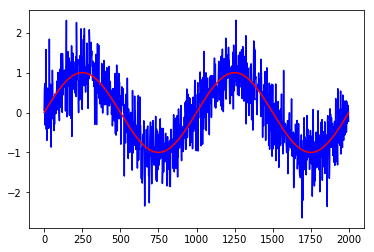

In [108]:
N = 1000
dt = 2 # seg
times = get_time(N, dt)
noise = get_noise(N, 0.5)
data = get_data(times, 0.001, noise=noise)
temp = get_data(times, 0.001)
plt.plot(times, data, "b")
plt.plot(times, temp, "r")

Text(0,0.5,'TimeSeries')

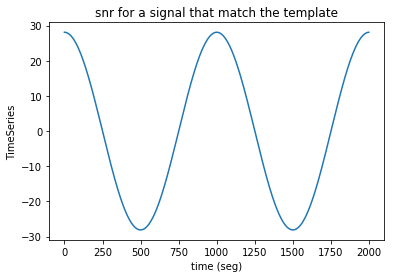

In [109]:
plt.plot(times, np.real(snr(data, temp, dt)))
plt.title("snr for a signal that match the template")
plt.xlabel("time (seg)")
plt.ylabel("TimeSeries")

Text(0,0.5,'TimeSeries')

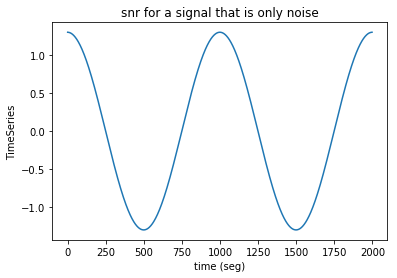

In [110]:
plt.plot(times, np.real(snr(noise, temp, dt)))
plt.title("snr for a signal that is only noise")
plt.xlabel("time (seg)")
plt.ylabel("TimeSeries")